In [162]:
# importing default packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


os.chdir('/Users/sravan/PycharmProjects/hcd_proj_common_analysis')
os.getcwd()

'/Users/sravan/PycharmProjects/hcd_proj_common_analysis'

## Step 0: Data Acquisition
In this step, we start by downloading and reading the data. The different data tables are then filtered, cleaned and stadardized to get the final confirmed daily infection rate. We finally plot visualizations to understand the trends

In [163]:
# Confirmed cases CSV
df_conf_cases_us = pd.read_csv("data/RAW_us_confirmed_cases.csv")
df_conf_cases_us.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18511,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65973,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6930,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7575,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17320,17320,17320,17320,17320,17320


In [164]:
# Mask mandate data in the New Haven county
df_mask_mandate_NH = pd.read_csv("data/CT_NewHaven_mask_mandate.csv")
df_mask_mandate_NH.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,CT,New Haven County,9,9,4/10/2020,2,NaN,NaN,NaN,NaN
1,CT,New Haven County,9,9,4/11/2020,2,NaN,NaN,NaN,NaN
2,CT,New Haven County,9,9,4/12/2020,2,NaN,NaN,NaN,NaN
3,CT,New Haven County,9,9,4/13/2020,2,NaN,NaN,NaN,NaN
4,CT,New Haven County,9,9,4/14/2020,2,NaN,NaN,NaN,NaN


In [165]:
# Voluntary mask survey data
df_mask_use = pd.read_csv("data/mask-use-by-county.csv")
df_mask_use.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


### Data filtering and preprocessing

In [166]:
# Filtering confirmed cases
df_conf_cases_NH = df_conf_cases_us[(df_conf_cases_us["Province_State"] == "Connecticut")
                                    & (df_conf_cases_us["Admin2"] == "New Haven")]

# Extracting FIPS value of New Haven to filter other datasets

CT_NH_FIPS = df_conf_cases_NH['FIPS'].values[0]
print(f'STATE:\tConnecticut\nCOUNTY:\tNew Haven\nFIPS:\t{int(CT_NH_FIPS)}')
df_conf_cases_NH.head()

STATE:	Connecticut
COUNTY:	New Haven
FIPS:	9009


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
327,Connecticut,New Haven,84009009,US,USA,840,9009.0,US,41.408032,-72.936204,...,239438,239502,239641,239806,239957,240154,240338,240382,240429,240549


In [167]:
# Filtering mask use data to obtain New Haven related records
df_mask_use_NH = df_mask_use.loc[df_mask_use['COUNTYFP']==CT_NH_FIPS]
df_mask_use_NH.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
312,9009,0.023,0.014,0.053,0.115,0.795


In [168]:
# Assuming the missing values as No, meaning people were not mandated to wear masks
df_mask_mandate_NH["Face_Masks_Required_in_Public"] = df_mask_mandate_NH["Face_Masks_Required_in_Public"]
df_mask_mandate_NH = df_mask_mandate_NH[['date', 'Face_Masks_Required_in_Public']]
df_mask_mandate_NH["date"] = pd.to_datetime(df_mask_mandate_NH["date"])
df_mask_mandate_NH.head()

,date,Face_Masks_Required_in_Public
0,2020-04-10,NaN
1,2020-04-11,NaN
2,2020-04-12,NaN
3,2020-04-13,NaN
4,2020-04-14,NaN


In [169]:
# Extracting data for maricopa cases by date and creating a separate dataframe

df_conf_cases_NH_by_date = pd.DataFrame(df_conf_cases_NH.iloc[0][11:])
df_conf_cases_NH_by_date = df_conf_cases_NH_by_date.reset_index()
df_conf_cases_NH_by_date.columns = ["date", "number_of_cases"]
df_conf_cases_NH_by_date['date'] = pd.to_datetime(df_conf_cases_NH_by_date["date"])
df_conf_cases_NH_by_date.head()

,date,number_of_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


## Step 1 - Analyze

In [170]:
# Merging mask mandate and confirmed cases data
df_cases_masks = pd.merge(df_conf_cases_NH_by_date, df_mask_mandate_NH, how = 'left').fillna('No')
df_cases_masks.head()

,date,number_of_cases,Face_Masks_Required_in_Public
0,2020-01-22,0,No
1,2020-01-23,0,No
2,2020-01-24,0,No
3,2020-01-25,0,No
4,2020-01-26,0,No


In [171]:
# Calculate the daily infection rate change, by calculating the change of derivative function of infection change
df_cases_masks["case_rate"] = pd.Series(np.gradient(df_conf_cases_NH_by_date["number_of_cases"]),
                                                  df_conf_cases_NH_by_date["date"], name='case_rate').values
df_cases_masks.head()

,date,number_of_cases,Face_Masks_Required_in_Public,case_rate
0,2020-01-22,0,No,0.0
1,2020-01-23,0,No,0.0
2,2020-01-24,0,No,0.0
3,2020-01-25,0,No,0.0
4,2020-01-26,0,No,0.0


In [172]:
df_cases_masks.describe()

,number_of_cases,case_rate
count,1015.000000,1015.000000
mean,99809.090640,237.053202
std,80476.693699,438.360550
min,0.000000,0.000000
25%,14551.500000,24.250000
50%,92136.000000,125.500000
75%,189352.000000,260.750000
max,240549.000000,5842.500000


Text(0.5, 1.0, 'Confirmed cases by date')

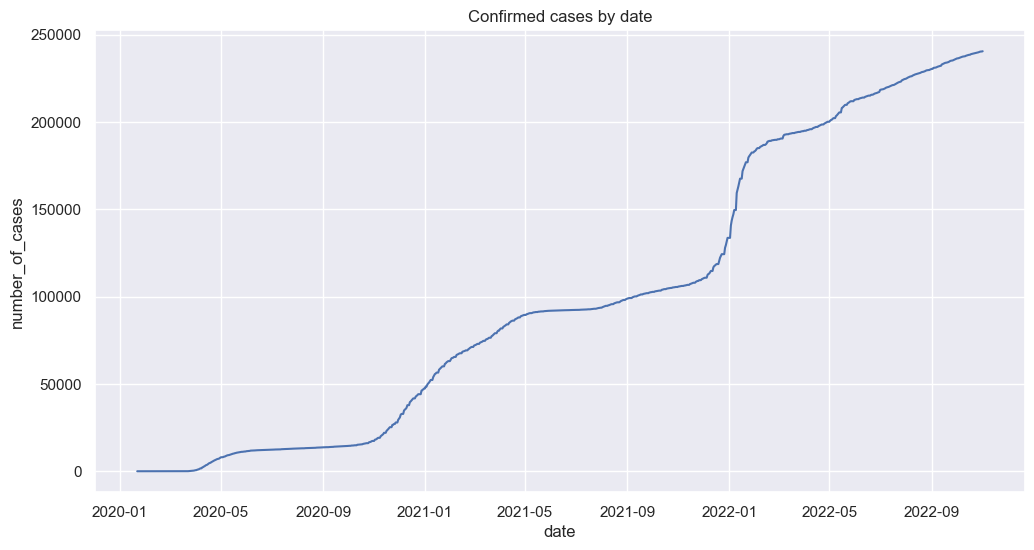

In [173]:
# Preliminary visualisations - confirmed cases by date
sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df_cases_masks, x='date', y='number_of_cases')\
    .set_title("Confirmed cases by date")

Text(0.5, 1.0, 'Infection rate by date')

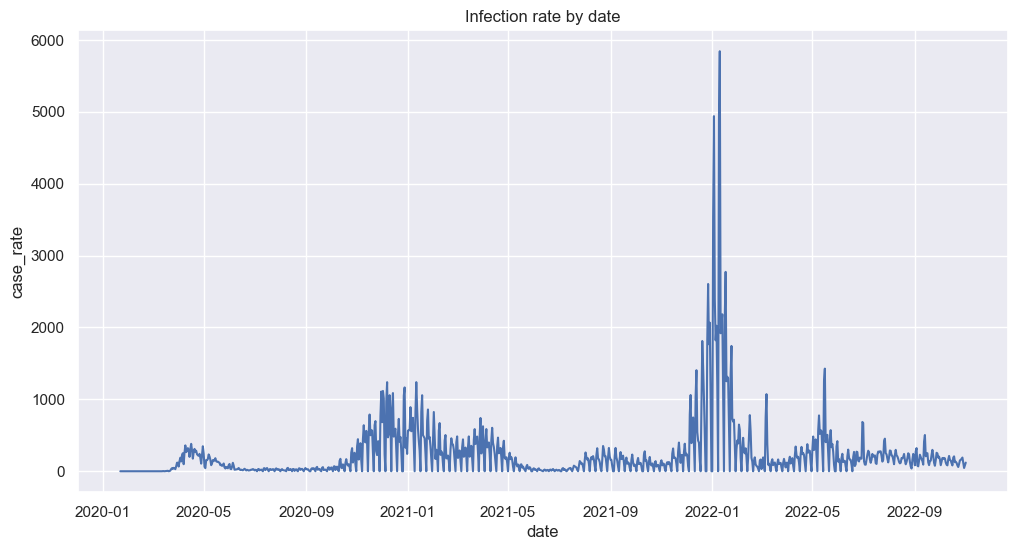

In [174]:
# Preliminary visualisations - Daily infection rate
sns.lineplot(data=df_cases_masks, x='date', y='case_rate')\
    .set_title("Infection rate by date")

<Figure size 1200x600 with 0 Axes>

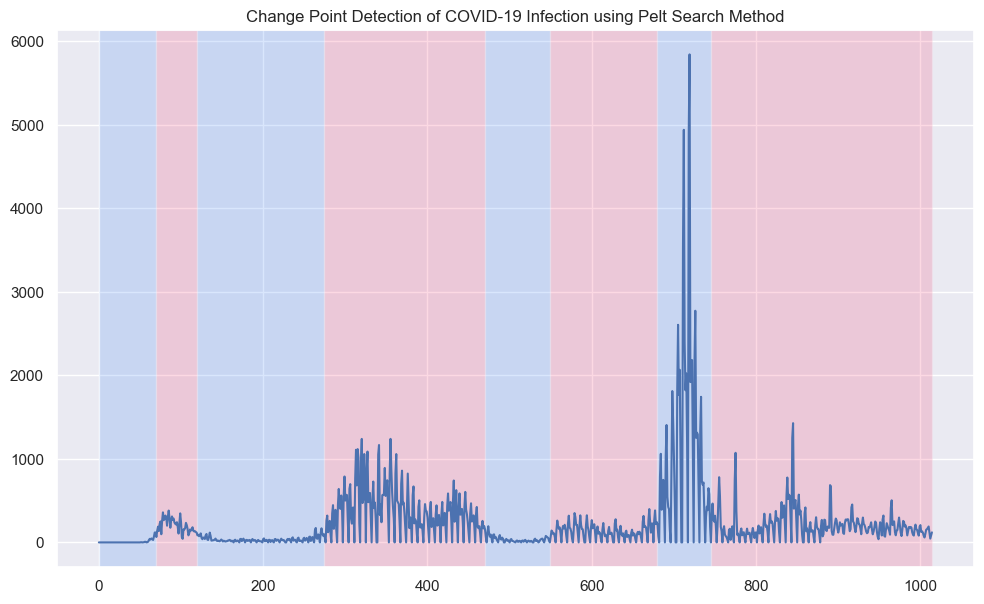

In [175]:
import ruptures as rpt
# Using PElt Search method on the case rate to detect change points

case_rate=np.array(df_cases_masks['case_rate'])

rpt_model = rpt.Pelt(model='rbf').fit(case_rate)
preds = rpt_model.predict(pen=10)

plt.figure(figsize=(12,6))
rpt.display(case_rate, preds, figsize=(10,6))
plt.title("Change Point Detection of COVID-19 Infection using Pelt Search Method")
plt.show()

In [176]:
ruptures = []
for pred in preds:
    ruptures.append(df_cases_masks.index[pred-1])
print('Change points in the infections rate')
df_cases_masks['date'].iloc[ruptures].values

Change points in the infections rate


array(['2020-03-31T00:00:00.000000000', '2020-05-20T00:00:00.000000000',
       '2020-10-22T00:00:00.000000000', '2021-05-05T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [181]:
df_cases_masks['lead_day_mask_status'] = df_cases_masks['Face_Masks_Required_in_Public'].shift(-1)

df_mask_mandate_change = df_cases_masks[df_cases_masks['lead_day_mask_status'] != df_cases_masks['Face_Masks_Required_in_Public']]

df_cases_masks = df_cases_masks.fillna('No')\
    .drop(columns=['lead_day_mask_status'])

df_mask_mandate_change.dropna()

,date,number_of_cases,Face_Masks_Required_in_Public,case_rate,lead_day_mask_status
88,2020-04-19,4871,No,264.5,Yes
571,2021-08-15,95700,Yes,224.5,No


## Step2 - Visualize

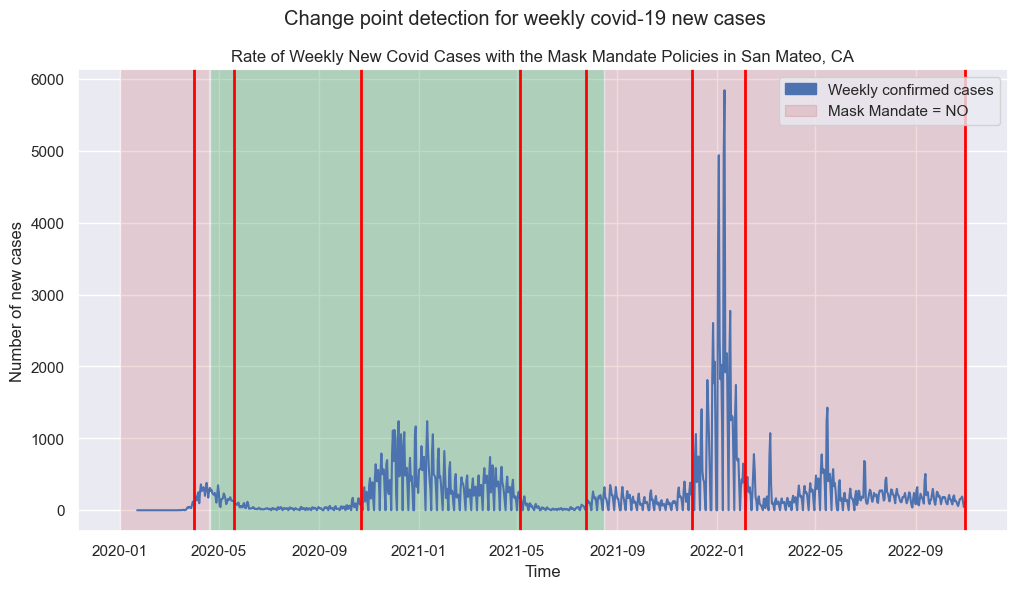

In [184]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,6))

sns.lineplot(data=df_cases_masks, x='date', y='case_rate')

# Plotting red horizontal lines for days when a change point is detected
for rup in ruptures:
    plt.axvline(df_cases_masks['date'].iloc[rup],lw=2, color='red')

red_patch = mpatches.Patch(color='red', label='Change point detected')
blue_patch = mpatches.Patch(color='b', label='Weekly confirmed cases')

# -------------------------------------------------------------------------------------------
# Adding titles and labels for the visualization
plt.title('Rate of Weekly New Covid Cases with the Mask Mandate Policies in San Mateo, CA')
plt.suptitle('Change point detection for weekly covid-19 new cases ')
plt.xlabel('Time')
plt.ylabel('Number of new cases')

# -------------------------------------------------------------------------------------------
# As per CDC data
# lighter green background = Mask mandate is YES
# from the dataframe above 'm_mandate_county'

plt.axvspan('2020-01-01', '2020-04-19', facecolor='r', alpha=0.2)
plt.axvspan('2021-08-16', '2022-11-01', facecolor='r', alpha=0.2)
red_patch = mpatches.Patch(color='r', alpha=0.2, label='Mask Mandate = NO')

# -------------------------------------------------------------------------------------------
# Estimates from The New York Times, based on roughly 250,000 interviews conducted by Dynata
# from July 2 to July 14, 2020

# From the dataframe 'mask_survey', frequently+always mask = 91.2%
# hence darker green window for this time period

plt.axvspan('2020-04-20', '2021-08-15', facecolor='g', alpha=0.4)
green_patch = mpatches.Patch(color='g', alpha=0.2, label='Mask Mandate = YES')

# -------------------------------------------------------------------------------------------
# From the CDC data in the dataframe 'm_mandate_county' and from the internet that prior to
# the start of 4/10/20 there was no mask mandate.
# pink background = Mask Mandate is NO


# -------------------------------------------------------------------------------------------
# Passing all the patches arguments to the legend parameter
plt.legend(handles=[blue_patch, red_patch])